In [1]:
import sys,os
import uproot4 as uproot
import awkward1 as ak
import json
import numpy as np
import matplotlib.pyplot as plt
from fcc_python_tools.locations import loc
from fcc_python_tools import kinematics
from particle import literals as lp
from fcc_python_tools import plotting
import random
from scipy.optimize import minimize

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

In [69]:
#Load results from my thrust calculation
thrust_vals = {}
file_type = "bbbar"
with open(f"{loc.JSON}/thrust_{file_type}.json", 'r') as fp:
    dict = json.load(fp)

for comp in ["x","y","z"]:
        thrust_vals[comp] = []
        
for i in dict:
    thrust_mag = np.sqrt(dict[i][f"thrust_axis_x"]**2 + dict[i][f"thrust_axis_y"]**2 + dict[i][f"thrust_axis_z"]**2)    
    for comp in ["x","y","z"]:
        thrust_vals[comp].append(dict[i][f"thrust_axis_{comp}"]/thrust_mag)     

In [76]:
#Load Clements results
file = uproot.open("/eos/experiment/fcc/ee/tmp/events_102788027.root")
tree = file['events']

array = tree.arrays(how="zip")[:999]

In [82]:
array['event_thrust_mag'] = np.sqrt(array['event_thrust_x']**2 + array['event_thrust_y']**2 + array['event_thrust_z']**2)
for comp in ["x","y","z"]:
    array[f"event_thrust_{comp}_norm"] = array[f"event_thrust_{comp}"] / array['event_thrust_mag']

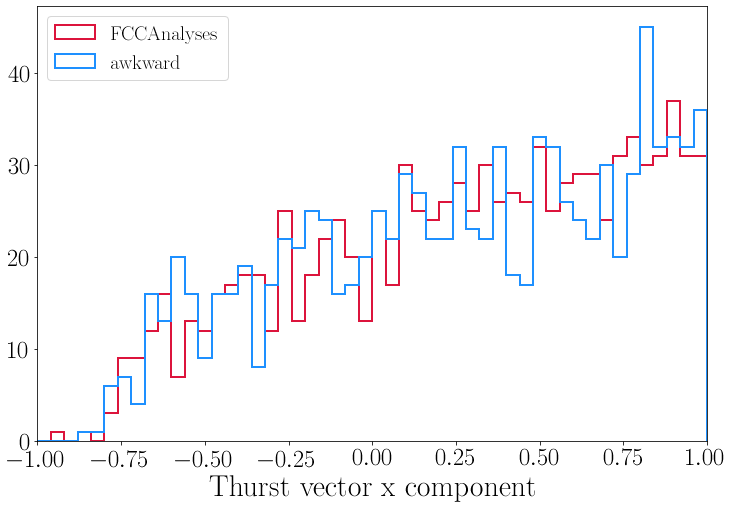

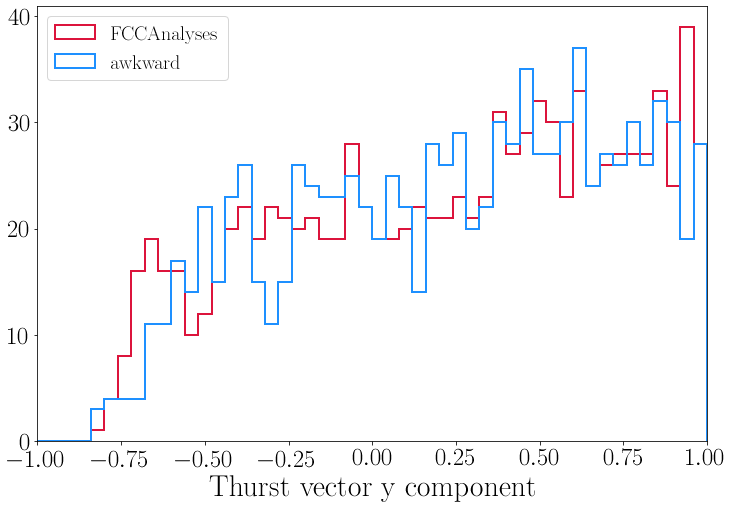

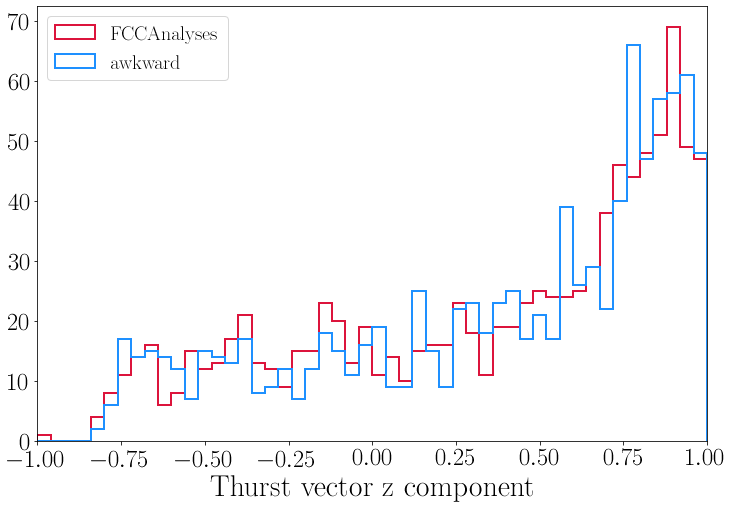

In [84]:
for comp in ["x","y","z"]:
    fig,ax = plt.subplots(figsize=(12,8))
    plt.hist(array[f'event_thrust_{comp}_norm'].tolist(),bins=50,range=(-1,1),histtype='step',color='crimson',linewidth=2,label="FCCAnalyses")
    plt.hist(thrust_vals[comp],bins=50,range=(-1,1),histtype='step',color='dodgerblue',linewidth=2,label="awkward")
    plt.xlim(-1,1)
    plt.legend(loc='upper left',fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=25)
    plt.xlabel(f"Thrust vector {comp} component",fontsize=30)
    plt.show()

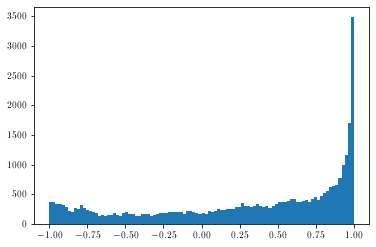

In [87]:
plt.hist(ak.flatten(array["RP","thrustangle"]),bins=100)
plt.show()